In [2]:
import cv2
import joblib
import os
from matplotlib import pyplot as plt
from src.utils import *

In [3]:
model_name = "svm_best_model.pkl"

model_path = os.path.join("src/checkpoint", model_name)
model = joblib.load(model_path)

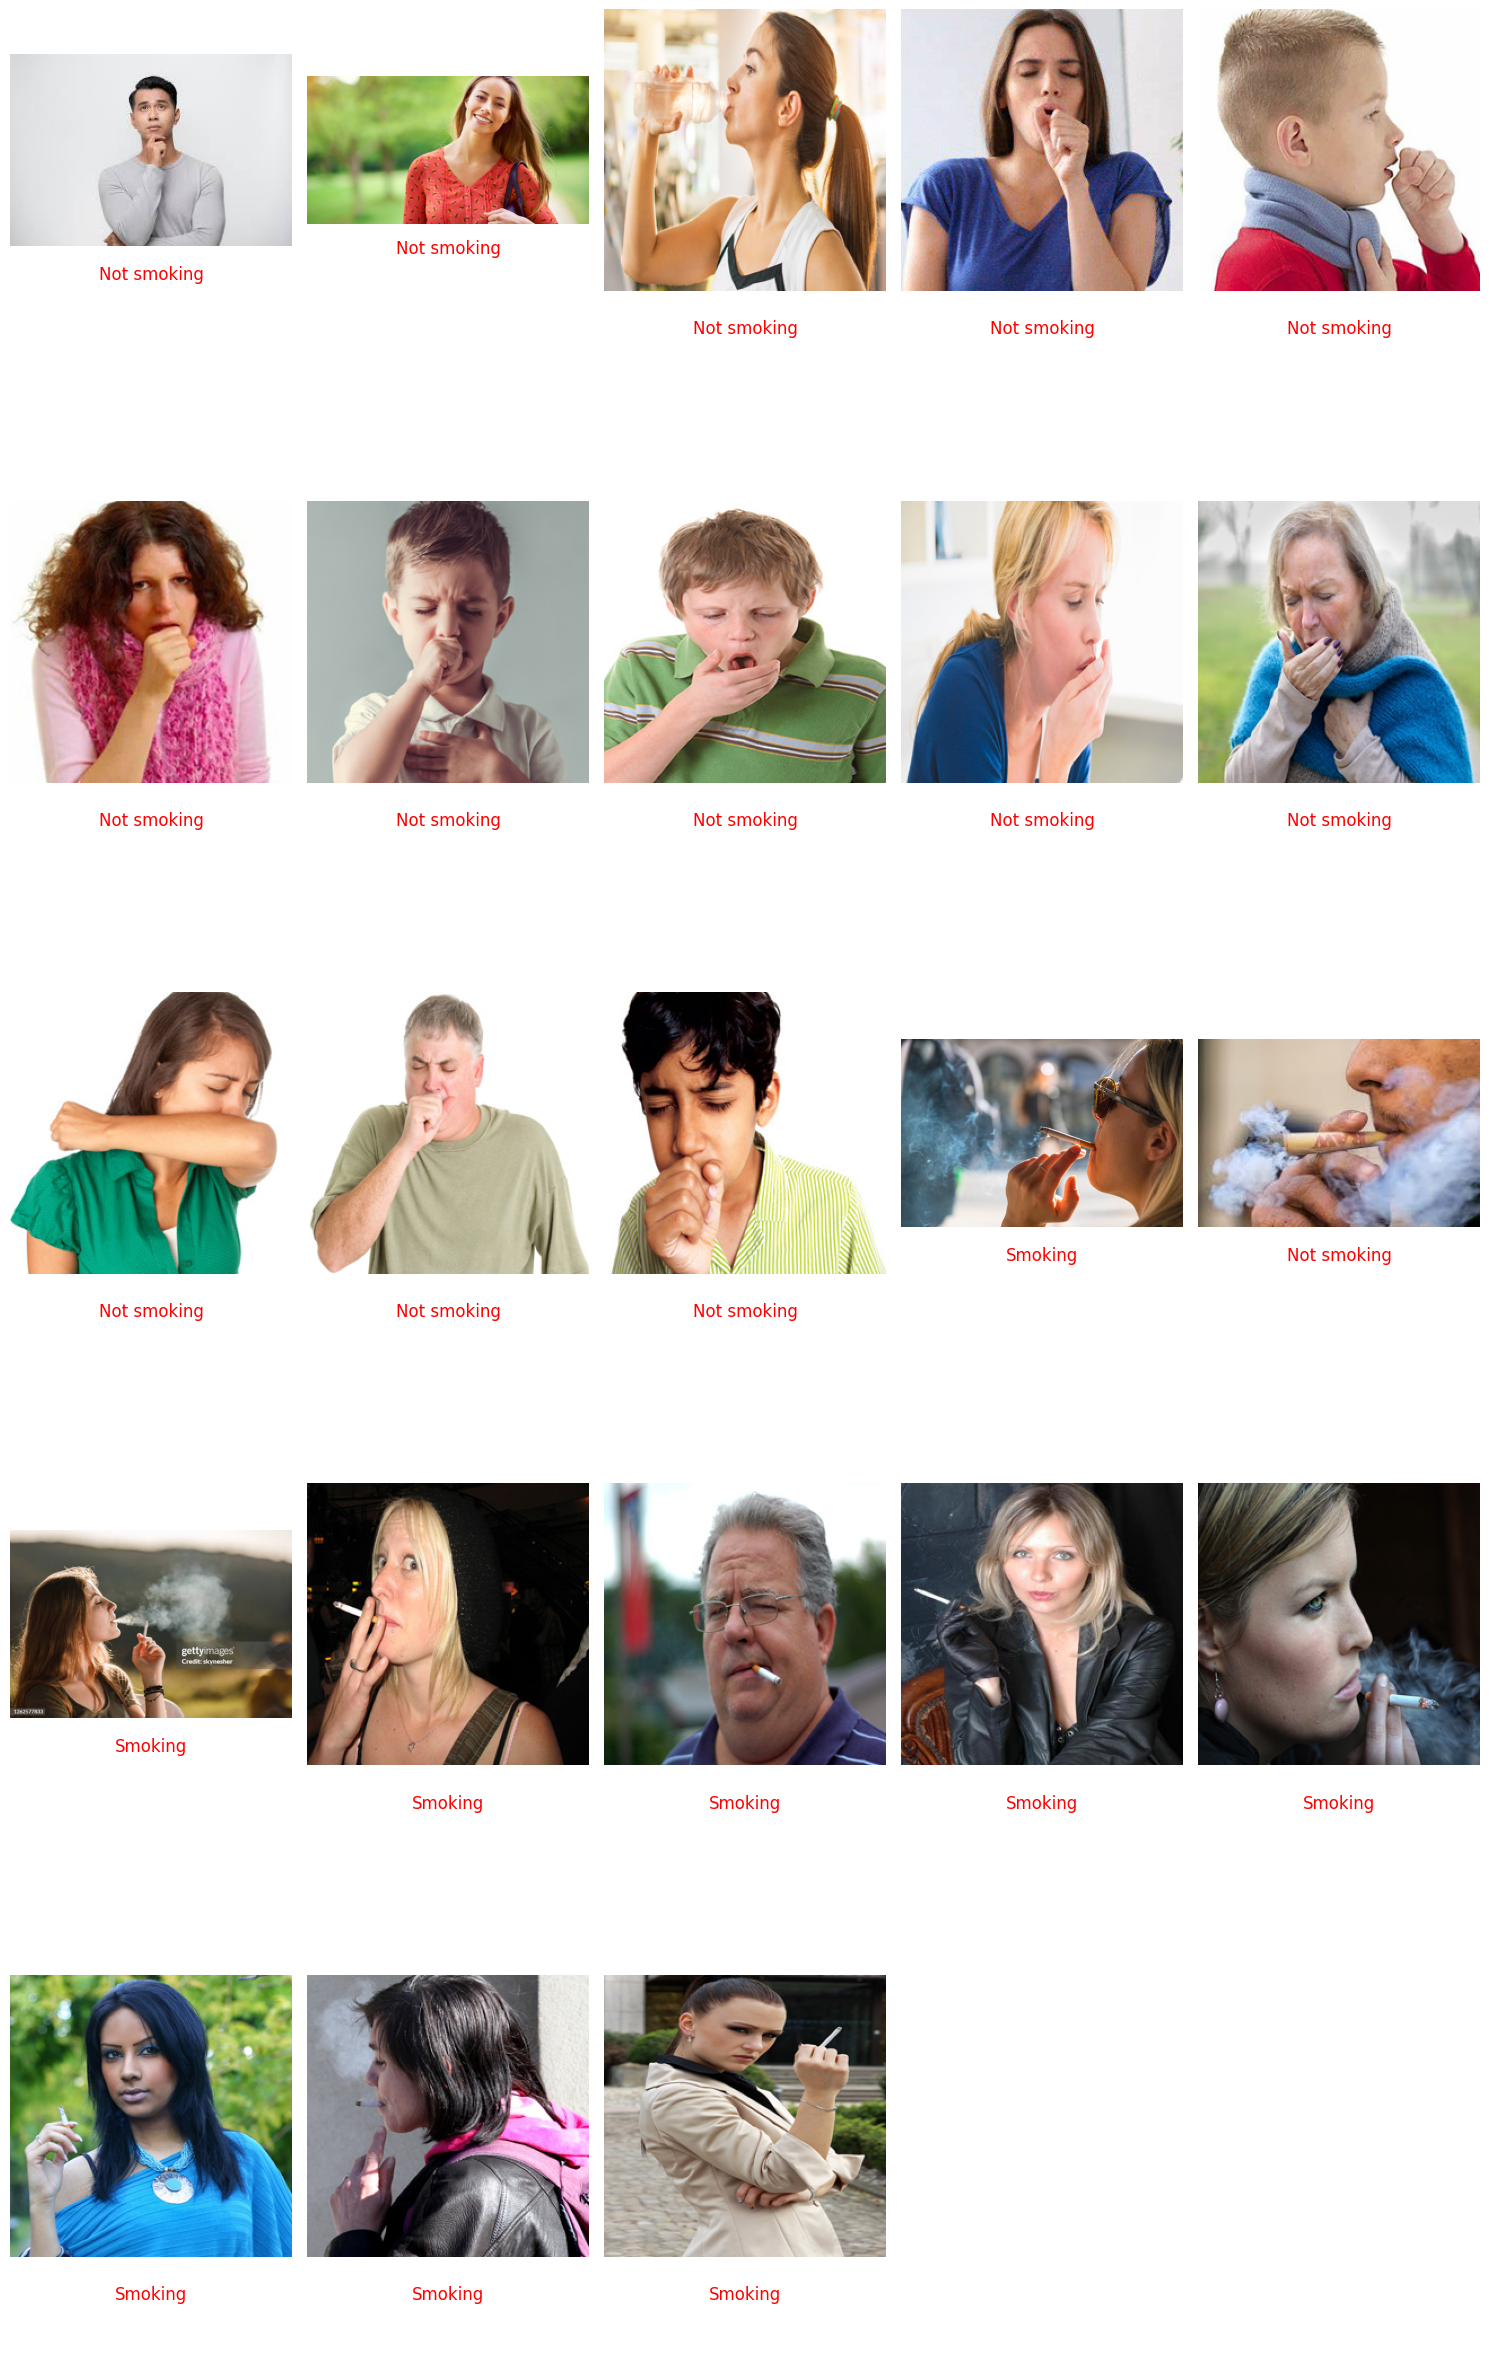

In [6]:
test_path = "data/test/"
image_files = os.listdir(test_path)

# Số lượng ảnh muốn hiển thị mỗi hàng
images_per_row = 5
# Số lượng hàng cần thiết
num_rows = (len(image_files) // images_per_row) + (1 if len(image_files) % images_per_row != 0 else 0)

# Tạo subplots với số hàng và cột phù hợp
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 5 * num_rows))

# Lặp qua từng ảnh và hiển thị
for i, image_name in enumerate(image_files):
    image_path = os.path.join(test_path, image_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Đổi màu từ BGR sang RGB

    # Dự đoán nhãn cho ảnh
    label = predict(image, model)

    # Tính toán vị trí hàng và cột của ảnh trong grid
    row = i // images_per_row
    col = i % images_per_row

    # Hiển thị ảnh tại vị trí hàng, cột
    axes[row, col].imshow(image)
    axes[row, col].axis('off')  # Tắt hiển thị trục

    # Vẽ nhãn dưới ảnh
    axes[row, col].text(0.5, -0.1, label, ha='center', va='top', fontsize=12, color='red', transform=axes[row, col].transAxes)

# Tắt các trục thừa nếu số ảnh không đủ fill hết các cột
for i in range(len(image_files), num_rows * images_per_row):
    row = i // images_per_row
    col = i % images_per_row
    axes[row, col].axis('off')

plt.tight_layout()  # Điều chỉnh khoảng cách giữa các ảnh
plt.show()